In [3]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [4]:
# dataset_name = "W19_comb"
# df_list = [ "BES_Panel", ]
# # df_list = []

In [5]:
# %matplotlib inline

# import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# import pickle, os, gc, re

# sns.set();
# sns.set_palette("colorblind")

# from IPython.display import display, display_html, HTML
# from IPython.core.debugger import set_trace
# # plt.rcParams["axes.grid"] = False

# import Jupyter_module_loader
# from utility import *
# import gaussian_kde

# import warnings
# warnings.filterwarnings('ignore')

# import holoviews as hv
# from holoviews import opts

# encoding = "ISO-8859-1"

In [6]:
# # you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# # %matplotlib inline
# (BES_code_folder, BES_small_data_files, BES_data_folder,
#  BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()

# global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
# data_subfolder = BES_data_folder + dataset_name + os.sep

# (manifest, dataset_filename, dataset_description, dataset_citation,
#  dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

# for df in df_list:
#     if df=="BES_Panel":
# #         globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
#         globals()[df]  = pd.read_pickle(data_subfolder + dataset_filename.replace('.dta','.zip'),compression='zip')
#     else:
#         globals()[df]  = pd.read_pickle(data_subfolder + df + '.zip',compression='zip')
# #         read_msgpack(data_subfolder + df + '.msgpack' )
#         globals()[df].replace(-1,np.nan,inplace=True)
  
# # (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

# # get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_values"+".csv")
# pan_dataset_ages = pd.read_csv( BES_small_data_files + "pan_dataset_ages"+".csv" )

In [7]:
%%time
dataset_name = "W25_comb"
df_list = 'BES_Panel'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

# pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
# pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

Toggle code

var_type (10365, 13)
var_type (10365, 13)
Wall time: 6min 40s


In [4]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show,  output_notebook
from bokeh.layouts import column, row, layout
from bokeh.embed import components
from bokeh.models import HoverTool
from bokeh.models import Span, Label
from bokeh.models import BoxAnnotation
output_notebook()
from datetime import timedelta
from scipy.signal import find_peaks
from bokeh.models import Span
from datetime import datetime
import pytz

Loading BokehJS ...

In [5]:
# BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES2019_W19_Panel_v0.1_cleaned.zip",compression='zip')

# Step One: Locate the period of the Major Shift In Sentiment
- Find all the directly-immigration-related sentiment variables

* personal preferences for immigration levels (immigrationLevel|immigSelf|(types)More)
* personal perception of *impact* of immigration (immigEcon|immigCultural|immigContibuteTake|ImmigrantsWelfareState|ukCoopMovement)
* personal expectations about immigration levels/control (effectsEUImmigration|changeImmig|controlImmig)
* perception of parties/(gov/opp) preference/ability to/responsibility for changing/reducing immig/prioritisation of immig
    (immig(parties)/responsibleImmig(parties)/achieveReduceImmig/(party)Priorities_immig)
* preference/perception of immigration priority in EU negotiations (euPriorityBalance|dealPriority|negotiationSpecifics)

* not sure where "benefitsToMigrants" fits in - not really an impact/level/expectation
- but I would expect it to correlate with immigContributeTake/ImmigrantsWelfareState

In [6]:
# wave="W1"

# BES_Panel[wts_for_wave[wave]][BES_Panel[wave.replace("W","wave")]].isnull().sum(), wts_for_wave[wave]

# # 629 missing variables in weights from W8 - W19

# # 643 W7 - heads up to 983


In [9]:
# %%time
# Fix up all the datasets we'll be using (make sure all categories correctly/consistently ordered)
immig_var_stub = ["immigEcon","immigCultural","immigSelf","immigrationLevel","immigContributeTake",
                  "immigrantsWelfareState","controlImmig","effectsEUImmigration","euPriorityBalance",
                  "changeImmig","changeImmigLab","govtHandleImmig","labHandleImmig",
                  "asylumMore","euMore","noneuMore","studentsMore","familiesMore",
                  "responsibleImmig","achieveReduceImmig",
                  "conPriorities_immig","labPriorities_immig","ldPriorities_immig","ukipPriorities_immig",
                  "dealPriority","ukCoopMovement","negotiationSpecifics","benefitsToMigrants","childBenefitsRepatriate"]

fix_cat_dict = {}
# not sure about best way to line up "expectation" variables
fix_cat_dict['changeImmig']=['Getting a lot lower', 'Getting a little lower','Staying about the same',
                             'Getting a little higher', 'Getting a lot higher',  "Don't know" ]
fix_cat_dict['effectsEUImmigration'] = ['Much lower', 'Lower', 'About the same', 'Higher', 'Much higher', "Don't know"]
fix_cat_dict['controlImmig']=['No control at all', 'A little control', 'Some control', 'A lot of control', 'Complete control', "Don't know"]

# lets try to get every axis pointing in the same "sentiment" direction
fix_cat_dict['immigEcon']=['Bad for economy','2', '3', '4', '5', '6', 'Good for economy',  "Don't know"]
fix_cat_dict['immigCultural']=['Undermines cultural life', '2', '3', '4', '5', '6', 'Enriches cultural life', "Don't know" ]
fix_cat_dict["immig(Self|Con|Lab|TIG|Brexit|Green|UKIP|PC|SNP|LD)W"] = ['Allow many fewer', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Allow many more', "Don't know"]
fix_cat_dict['(students|eu|asylum|families|noneu)More'] = ['Many fewer', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Many more', "Don't know"]
fix_cat_dict['immigrantsWelfareState'] = ['Strongly agree', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Strongly disagree', "Don't know"]
fix_cat_dict['immigContributeTake'] = ['Get more than they pay', '2.0', '3.0', '4.0',
                                       '5.0', '6.0', 'Pay more than they get', "Don't know"]
fix_cat_dict['euPriorityBalance'] = ['Control immigration', '9', '8', '7', '6', '5', '4', '3', '2', '1', 'Access to the single market', "Don't know"]
fix_cat_dict['immigrationLevel'] = ['Decreased a lot', 'Decreased a little', 'Left the same as it is now',
                                    'Increased a little', 'Increased a lot',  "Don't know"]
fix_cat_dict['ukCoopMovement'] = ["Bad for Britain", "Neither good nor bad for Britain", "Good for Britain", "Don't know"]
fix_cat_dict['benefitsToMigrants'] = ['Immediately on arrival','After living in GB for a year',
                                      'After they have worked and paid taxes for at least four years',
                                      'After they become a British citizen', 'Never', "Don't know"]



# fix_cat_dict['immigrantsWelfareState'] = ['Strongly disagree', 'Disagree',  'Neither agree nor disagree','Agree', 'Strongly agree',"Don't know", ]
# mostly dealPrioritImmig, but might be worth setting alongside the other dealPriority variables
fix_cat_dict['dealPriority'] = ['Not important at all', 'Not very important', 'Somewhat important',
                                'Very important', 'Extremely important' , "Don't know"]

# fix_cat_dict['euPriorityBalance'] = ['Access to the single market', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Control immigration', "Don't know"]
fix_cat_dict['(lab|govt)HandleImmig'] = ['Very badly', 'Fairly badly', 'Neither well nor badly', 'Fairly well', 'Very well', "Don't know"]
fix_cat_dict['responsibleImmig(Conservatives|LibDems|Labour|ScottishGovt|WelshGovt|None|DontKnow)'] = ["No","Yes","Don't know"]
fix_cat_dict['achieveReduceImmig(Brexit|Con|Grn|LD|Lab|None|PC|SNP|TIG|UKIP)'] = ["No","Yes","Don't know"]

fix_cat_dict["(con|lab|ld|ukip)Priorities_immig"] = ["No","Yes","Don't know"]
# my time plotting function assumes variable names won't contain _ - quick hack to circumvent having to change that
BES_Panel[[x.replace("_i","I") for x in search(BES_Panel,"Priorities_immig").index]] = BES_Panel[[x for x in search(BES_Panel,"Priorities_immig").index]]

# my time plotting function assumes variable names won't contain _ - quick hack to circumvent having to change that
BES_Panel[[x.replace("_1","ContinuePayingMoney").replace("_2","AcceptingFoM").replace("_3","AcceptingEUReg").replace("_none","Nothing") for x in search(BES_Panel,"negotiationSpecifics").index]] = BES_Panel[[x for x in search(BES_Panel,"negotiationSpecifics").index]]

fix_cat_dict["negotiationSpecifics"] = ["No","Yes","Don't know"]

def cat_2_num_drop_dk(x):
    if x.dtype.name=='category':
        return x.replace("Don't know",np.nan).cat.remove_unused_categories().cat.codes.replace(-1,np.nan).astype('UInt16')
    else:
        return x

def fix_cats(fix_cat_dict):
    for key in fix_cat_dict.keys():
        BES_Panel[ match(BES_Panel, key ).index ] = BES_Panel[ match(BES_Panel,key ).index ]\
            .apply( lambda x: x.cat.set_categories( fix_cat_dict[key], ordered =True ) )
    
fix_cats(fix_cat_dict)

def weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]
#     raise Exception
    return (val * weight).sum() / weight.sum()

def datetime_weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    val = pd.Series(val).apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)
    mask = (~np.isnan(val))
    val, weight = val[mask],weight[mask]
    result = (val * weight).sum() / np.sum(weight)
#     raise Exception
    result = datetime.fromtimestamp(result,tz=pytz.timezone('GMT')) if pd.notnull(result) else np.nan  # turn back from timestamp
    return result

# max_wave = int(re.match("W(\d+)_",dataset_name).groups()[0])
max_wave = np.max([int(x.replace("wave","")) for x in match(BES_Panel,"wave\d+$").index])
num_to_wave = {x:"W"+str(x) for x in range(1,max_wave+1)}
wts_for_wave = { "W"+str(y):[x for x in BES_Panel.columns.sort_values(ascending=False) if re.match("wt_(new|full)_W"+str(y)+"(_result)?"+"$",x)][0] for y in range(1,max_wave+1) }
# wts_for_wave["W5"] = 'wt_daily_W5'
# wts_for_wave["W8"] = 'wt_daily_W8'
# wts_for_wave["W12"] = 'wt_daily_W12'
# wts_for_wave["W18"] = 'wt_daily_W18'

# dirty hack to deal with missing values in weights
# BES_Panel[list(wts_for_wave.values())] = BES_Panel[list(wts_for_wave.values())].replace(np.nan,1.0)
# feedback from BES folk -> drop these respondents!

# drop_ids = BES_Panel.loc[BES_Panel[wts_for_wave.values()].isnull().all(axis=1)].index
# BES_Panel.drop(drop_ids, inplace=True)

waves = BES_Panel[search(BES_Panel,"wave\d").index].copy()
wts = BES_Panel[wts_for_wave.values()].isnull().copy()
wts.columns = waves.columns
drop_ids = BES_Panel.loc[((wts*waves).sum(axis=1)>0)].index
BES_Panel.drop(drop_ids, inplace=True)

# still leaves some with misssing

BES_Panel[list(wts_for_wave.values())] = BES_Panel[list(wts_for_wave.values())].replace(np.nan,1.0)

wave_to_date = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"][["Wave No","Date_Start"]].set_index("Wave No")["Date_Start"]


### CHECK TIMES IN NEW 3 WAVES!

# fix endtimeW3 bug!
BES_Panel.loc[BES_Panel["endtimeW3"]=='1970-01-01 00:00:00',"endtimeW3"] = \
    BES_Panel[BES_Panel["endtimeW3"]=='1970-01-01 00:00:00']["starttimeW3"].values

# this is also suspect - date not unreasonable, but overlaps with a different wave! (3 days between start/end)
# 41222   2015-03-27 18:11:37.047
# Name: starttimeW5, dtype: datetime64[ns]
BES_Panel.loc[BES_Panel["starttimeW5"]=='2015-03-27 18:11:37.047000064',"starttimeW5"] = \
    BES_Panel[BES_Panel["starttimeW5"]=='2015-03-27 18:11:37.047000064']["endtimeW5"].values

# still some overlap between waves 4 and 5

midpoint_dict = {}
startpoint_dict = {}
endpoint_dict = {}
# create correct midpoints (technically we should weight these!)
n = 1
min_sample_size = 100
for wave_no in range(1,max_wave+1):
    wave = "W"+str(wave_no)
#     print(wave)

#     BES_Panel["midpoint"+wave] = pd.qcut(BES_Panel["endtime"+wave]+((BES_Panel["endtime"+wave]-BES_Panel["starttime"+wave])/2),n)
#     date_cats_dict = {BES_Panel["midpoint"+wave].cat.categories[x]:(BES_Panel["midpoint"+wave].cat.categories[x].left+ (BES_Panel["midpoint"+wave].cat.categories[x].right - BES_Panel["midpoint"+wave].cat.categories[x].left)/2).strftime("%Y-%m-%d") for x in range(n)}
#     BES_Panel["midpoint"+wave] = pd.to_datetime(BES_Panel["midpoint"+wave].replace(date_cats_dict))  
    BES_Panel["endpoint"+wave] = pd.to_datetime(BES_Panel["endtime"+wave]).max() 
    BES_Panel["startpoint"+wave] = pd.to_datetime(BES_Panel["starttime"+wave]).min() 
    
    BES_Panel["midtime"+wave] = (BES_Panel["starttime"+wave]+(BES_Panel["endtime"+wave]-BES_Panel["starttime"+wave])/2)
#     BES_Panel["midtime"+wave] = BES_Panel["midtime"+wave].apply(lambda x:x.replace(second=0, microsecond=0, nanosecond=0))
    BES_Panel["midpoint"+wave] = datetime_weighted_mean(zip(BES_Panel["midtime"+wave],BES_Panel[wts_for_wave[wave]]))

    startpoint_dict[wave] = BES_Panel["startpoint"+wave].dropna().values[0]
    endpoint_dict[wave] = BES_Panel["endpoint"+wave].dropna().values[0]
    midpoint_dict[wave] = BES_Panel["midpoint"+wave].dropna().values[0]

NameError: name 'datetime' is not defined

In [ ]:
colour_list = ["blue","red","purple", "olive","orange","brown", "pink","cyan","grey","green"]

In [ ]:
x_axis_label = "Response Date"
y_axis_label = "Responses/day"
plot_width=980
plot_height=600
tools='box_select,pan,xwheel_zoom,box_zoom,reset'
active_drag='pan'
active_scroll='xwheel_zoom'
title = "British Election Study Waves"
p= figure(x_axis_type="datetime", x_axis_label = x_axis_label,
            y_axis_label = y_axis_label,
            plot_width = plot_width, plot_height=plot_height,
            title = title, tools = tools, active_drag = active_drag, active_scroll=active_scroll)
p.title.text_font_size = '48pt'

date_col_dict = {"EE":'green',"GE":'red',"EU":'blue',"OB":'pink',"CL":'purple',"CAMP":'orange',"normal":'grey'}  

date_dict = {"22 May 2014":"EE","7 May 2015":"GE","23 June 2016":"EU",
             "8 June 2017":"GE","23 May 2019":"EE","21 April 2016":"OB",
             "9 October 2014":"CL","12 December 2019":"GE",
             "3 March 2015":"CAMP", "23 April 2017":"CAMP", "6 November 2019":"CAMP","15 April 2016":"CAMP"}

date_duration_dict = {"22 May 2014":1,"7 May 2015":1,"23 June 2016":1,
             "8 June 2017":1,"23 May 2019":1,"21 April 2016":2,
             "9 October 2014":1,"12 December 2019":1,
             "3 March 2015":37, "23 April 2017": 45, "6 November 2019":35,"15 April 2016":68 }
    
#     date_col_dict = {"EE":'green',"GE":'red',"EU":'blue',"OB":'pink',"CL":'purple',"CAMP":'orange'}  

wave_type_dict = dict(zip(["W"+str(x) for x in range(1,max_wave+1)],["normal"]*max_wave))

wave_type_dict["W1"] = "PRECAMP"
wave_type_dict["W4"] = "PRECAMP"
wave_type_dict["W7"] = "PRECAMP"
wave_type_dict["W11"] = "PRECAMP"
# wave_type_dict["W14"] = "PRECAMP"
wave_type_dict["W17"] = "PRECAMP"

wave_type_dict["W2"] = "CAMP"
wave_type_dict["W5"] = "CAMP"
wave_type_dict["W8"] = "CAMP"
wave_type_dict["W12"] = "CAMP"
wave_type_dict["W15"] = "CAMP"
wave_type_dict["W18"] = "CAMP"

wave_type_dict["W3"] = "POSTCAMP"
wave_type_dict["W6"] = "POSTCAMP"
wave_type_dict["W9"] = "POSTCAMP"
wave_type_dict["W13"] = "POSTCAMP"
wave_type_dict["W16"] = "POSTCAMP"
wave_type_dict["W19"] = "POSTCAMP"

wave_colour = { "PRECAMP": "red", "CAMP": "yellow", "POSTCAMP": "green", "normal":"grey" }

for wave in startpoint_dict.keys():

    my_label = Label(x=midpoint_dict[wave], y=200, y_units='screen', text=wave)
    df = BES_Panel[["midtime"+wave]].reset_index().set_index("midtime"+wave).resample('1d').count()["id"]
    ind = df.index.values
    ind[0] = startpoint_dict[wave]
#     ind[-1] = endpoint_dict[wave]
    df.index = ind
    p.quad(top=df.values, bottom=0, left=df.index, right=np.append(df.index[1:].values, endpoint_dict[wave] ),
           fill_color="navy", line_color="white", alpha=0.5)

    box_left = startpoint_dict[wave]
    box_right = endpoint_dict[wave]

    box = BoxAnnotation(left=box_left, right=box_right,
                        line_width=1, line_color='black', line_dash='dashed',
                        fill_alpha=0.2, fill_color= wave_colour[wave_type_dict[wave]])
                        #(colour_list+colour_list)[int(wave.replace("W",""))] )
    
    p.add_layout(my_label) 
    p.add_layout(box)
for date in date_dict.keys():       

    if date_dict[date]=="CAMP" or date_dict[date]=="CL" or date_dict[date]=="OB":
        continue
    my_label = Label(x=pd.to_datetime(date), y=400, y_units='screen', text=date_dict[date])
    p.add_layout(my_label) 

    box_left = pd.to_datetime(date)
    box_right = pd.to_datetime(date)+timedelta(days=date_duration_dict[date])

    box = BoxAnnotation(left=box_left, right=box_right,
                        line_width=1, line_color='black', line_dash='dashed',
                        fill_alpha=0.2, fill_color=date_col_dict[date_dict[date]])

    p.add_layout(box)   

show(p)

In [ ]:
def time_series(var_name,title,subtract_var=False,retain_var=True,specific_dates=True, specific_suffix_set="([a-zA-Z]*)",
                use_midpoints=False,col_name="party",dk_str="Don't know",max_y_size=10.0,min_waves_included=2,
                max_y_size_dict=None,max_wave=max_wave,use_BES_weights=True):

    whole_wave_dk_average = True
    df=pd.DataFrame()
    df2 =pd.DataFrame()
    df_wts =pd.DataFrame()
    df_dates = pd.DataFrame()
    
    if subtract_var:
        title=title+"\n(where respondents place parties relative to their own preference set at 0.5)"

    wave_list = []
    redist_vars = pd.Series([re.match(var_name+specific_suffix_set+"($|W\d+)",x).groups()[0] for x in BES_Panel.columns\
                             if re.match(var_name+specific_suffix_set+"($|W\d+)",x)]).value_counts()
    redist_vars = redist_vars[redist_vars>=min_waves_included].index

   
    
    for subj in redist_vars:
        for wave in ["W"+str(x) for x in range(1,max_wave+1)]:
            if var_name+subj+wave not in BES_Panel.columns:
                continue
            else:
                wave_list.append(wave)
            if max_y_size_dict:
                max_y_size = max_y_size_dict[subj]
#             df[var_name+"num_"+subj+"_"+wave] = zip(BES_Panel[var_name+subj+wave].replace(dk_str,np.nan).cat.codes.replace(-1,np.nan)/max_y_size,
#                                                  BES_Panel[var_name+subj+wave].apply(lambda x: x==dk_str if pd.notnull(x) else np.nan),
#                                                  BES_Panel[wts_for_wave[wave]]
#                                                    )
            
            df[var_name+"num_"+subj+"_"+wave] = BES_Panel[var_name+subj+wave].replace(dk_str,np.nan).cat.codes.replace(-1,np.nan)/max_y_size

            
            df2[var_name+"dk_"+subj+"_"+wave] = BES_Panel[var_name+subj+wave]==dk_str
            df2[var_name+"dk_"+subj+"_"+wave][BES_Panel[var_name+subj+wave].isnull()] = np.nan

           
            
    for wave in pd.unique(wave_list):        
        df_wts["wt_"+wave] = BES_Panel[wts_for_wave[wave]]
        
        if use_midpoints:
            df_dates["dt_"+wave] = BES_Panel["midpoint"+wave]
        else:
            df_dates["dt_"+wave] = (BES_Panel["starttime"+wave]+(BES_Panel["endtime"+wave]-BES_Panel["starttime"+wave])/2)
#             .apply(lambda x:x.date())

#     set_trace()
#     df_wts = df_wts[df.notnull().any(axis=1)]
#     df = df[df.notnull().any(axis=1)]

    df2.columns = df2.columns.str.split('_', expand=True)
    df2 = df2.stack(dropna=False)\
                .reset_index()\
                .rename(columns={'level_1':"wave"})\
                .rename(columns={'level_0':"id"}) 

    df_wts.columns = df_wts.columns.str.split('_', expand=True)
    df_wts = df_wts.stack(dropna=False)\
                .reset_index()\
                .rename(columns={'level_1':"wave"})\
                .rename(columns={'level_0':"id"}) 

    df_dates.columns = df_dates.columns.str.split('_', expand=True)
    df_dates = df_dates.stack(dropna=False)\
                .reset_index()\
                .rename(columns={'level_1':"wave"})\
                .rename(columns={'level_0':"id"}) 

    df.columns = df.columns.str.split('_', expand=True)
    df = df.stack(dropna=False)\
            .reset_index()\
            .rename(columns={'level_1':"wave"})\
            .rename(columns={'level_0':"id"}) 

    content_columns = [(var_name+"dk",x) for x in redist_vars]
    df["wt"] = df_wts["wt"]
    df[content_columns] = df2[content_columns]
    df["date"] = df_dates["dt"]
    content_columns = [(var_name+"num",x) for x in redist_vars]+[(var_name+"dk",x) for x in redist_vars]
    # only keep rows with content (variable values/dks)

    df = df[df[content_columns].notnull().any(axis=1)]

#     df = df.loc[ df[[x for x in df.columns if var_name+"num" in x]].notnull().any(axis=1) ]
    df.loc[:,"wt"] = df.loc[:,"wt"].fillna(1.0).values
    temp_ind_name = "temp_index"

#     if specific_dates:
#         df["date"] = df[["id","wave"]].merge(right=df_dates,
#                  how="left",left_on=["id","wave"],right_on=["id","wave"])["dt"].values

    df[temp_ind_name] = list(zip(df["wave"],df["wt"],df["date"],df["id"]))
    df = df.set_index(temp_ind_name).drop(["id","wave","wt","date"],axis=1)



    if subtract_var:
        if retain_var:
            focal_vars = [x for x in df.columns if (var_name+"num" in x) and (subtract_var not in x)]
            df[focal_vars] = df[focal_vars].apply(lambda x: x-df[(var_name+"num",  subtract_var)])+0.5
        else:
            focal_vars = [x for x in df.columns if var_name+"num" in x]
            df[focal_vars] = df[focal_vars].apply(lambda x: x-df[(var_name+"num",  subtract_var)])+0.5
            df.drop((var_name+"num",  subtract_var),axis=1,inplace=True)

#     df2["wt"] = df_wts["wt"]

#     df2 = df2.loc[ df2[[x for x in df2.columns if var_name+"dk" in x]].notnull().any(axis=1) ]
#     df2.loc[:,"wt"] = df2.loc[:,"wt"].fillna(1.0).values
#     if specific_dates:
#         df2["date"] = df2[["id","wave"]].merge(right=df_dates,
#                  how="left",left_on=["id","wave"],right_on=["id","wave"])["dt"].values

#     temp_ind_name = "temp_index"
#     df2[temp_ind_name] = list(zip(df2["wave"],df2["wt"],df2["date"]))
#     df2 = df2.set_index(temp_ind_name).drop(["id","wave","wt","date"],axis=1)


    flat_df_num = df.stack().reset_index().rename(columns={'level_1':col_name})

    if specific_dates:
        flat_df_num["wave"] = flat_df_num[temp_ind_name].apply(lambda x:x[0])    
    else:
        flat_df_num["wave"] = flat_df_num[temp_ind_name].apply(lambda x:int(x[0].split("W")[1]))

    flat_df_num["wt"]   = flat_df_num[temp_ind_name].apply(lambda x:x[1])
    flat_df_num["date"] = flat_df_num[temp_ind_name].apply(lambda x:x[2])
    flat_df_num["id"]   = flat_df_num[temp_ind_name].apply(lambda x:x[3])
    
    
    
    flat_df_num.drop(temp_ind_name,axis=1,inplace=True)
    flat_df_num[col_name] = flat_df_num[col_name].astype('category')

    flat_df_num[var_name+"_wts"] = list(zip(flat_df_num[var_name+"num"],flat_df_num["wt"]))
    flat_df_num[var_name+"_dk"] = list(zip(flat_df_num[var_name+"dk"],flat_df_num["wt"]))

    
#     flat_df_dk = df2.stack().reset_index().rename(columns={'level_1':col_name,0:"dk"})
#     if specific_dates:
#         flat_df_dk["wave"] = flat_df_dk[temp_ind_name].apply(lambda x:x[0])    
#     else:
#         flat_df_dk["wave"] = flat_df_dk[temp_ind_name].apply(lambda x:int(x[0].split("W")[1]))

#     flat_df_dk["wt"]   = flat_df_dk[temp_ind_name].apply(lambda x:x[1])
#     flat_df_dk["date"] = flat_df_dk[temp_ind_name].apply(lambda x:x[2])
    
#     flat_df_dk.drop(temp_ind_name,axis=1,inplace=True)
#     flat_df_dk[var_name+"dk"] = flat_df_dk[var_name+"dk"].astype('int')
    
#     if whole_wave_dk_average:
#     # calculating weighted total-wave dk average
#         flat_df_dk = flat_df_dk.groupby(["wave",col_name]).apply(lambda x: (x["wt"]*x[var_name+"dk"]).sum()/x["wt"].sum() ).reset_index().rename(columns={0:"dk"})
#         flat_df_num = flat_df_num.merge(right=flat_df_dk[[col_name,"wave","dk"]],how='left',left_on=[col_name,"wave"],right_on=[col_name,"wave"])        
#     else:
    
#         flat_df_dk["dk"+"_wts"] = list(zip(flat_df_dk[var_name+"dk"],flat_df_num["wt"]))
    

#     flat_df_num = flat_df_num.merge(right=flat_df_dk[[col_name,"wave","dk"]],how='left',left_on=[col_name,"wave"],right_on=[col_name,"wave"])
    if not specific_dates:
        flat_df_num["date"] = flat_df_num["wave"].apply(lambda x: wave_to_date[x])
        flat_df_num["date"] = pd.to_datetime(flat_df_num["wave"] , format="%b-%y")

#     raise Exception
        
    return flat_df_num, df, df2, 

In [ ]:
def sample_size(x, **kws):
    global max_sample_size    
    return len(x)/max_sample_size

def between_wave_retention(*args, **kwargs):
    global position_in_var_list
    var_name = kwargs['var_name'][position_in_var_list]
    position_in_var_list = position_in_var_list+1
    color = kwargs['color']
    label = kwargs['label']
    alpha = kwargs['alpha']
    df = BES_Panel[match(BES_Panel,var_name+"($|W\d+)").index].apply(lambda x: x.cat.codes.replace(-1,np.nan)).diff(axis=1).notnull().sum()/match(BES_Panel,var_name+"($|W\d+)")
    waves_present = {"W"+x.split("W")[-1]:BES_Panel["midpointW"+x.split("W")[-1]].dropna().values[0] for x in df.index}    
    df.index = [BES_Panel["midpointW"+x.split("W")[-1]].dropna().values[0] for x in df.index]
    df.drop(df.index[0],inplace=True)
    sns.lineplot(data=df,color=color,label=label,alpha=alpha)

    for wave in waves_present.keys():
        plt.text(x=waves_present[wave],y=0,s=wave, rotation=90, fontsize=12)   
        
def plot_time_series(var_name,specific_suffix_set,title,col_name,col_wrap,treatment,max_wave,use_BES_weights=True):
    dk_str="Don't know"
    lowest_alpha=0.3
    low_alpha=0.5    
    date_dict = {"22 May 2014":"EE","7 May 2015":"GE","23 June 2016":"EU","8 June 2017":"GE","23 May 2019":"EE"}
    date_col_dict = {"EE":'green',"GE":'red',"EU":'blue'}    
#     print(1)
    max_y_size_dict = {x: len(BES_Panel[match(BES_Panel,var_name+x+"($|W\d+)").index[0]].cat.remove_categories(dk_str).cat.categories)-1 for x in specific_suffix_set.replace("(","").replace(")","").split("|") }
    # max_y_size=len(BES_Panel[ match(BES_Panel,var_name+specific_suffix_set+"($|W\d+)").index[0] ].cat.remove_categories(dk_str).cat.categories)-1,
    flat_df_num, df, df2, = time_series(var_name,title,specific_suffix_set=specific_suffix_set,col_name="party",
                                max_y_size_dict = max_y_size_dict,
                                dk_str=dk_str,min_waves_included=2,use_midpoints=False,
                                max_wave=max_wave,use_BES_weights=use_BES_weights)
#     print(2)
#     raise Exception
    flat_df_num["wave_midpoint"] = flat_df_num["wave"].apply( lambda x: midpoint_dict[x] )
    flat_df_num["wave_startpoint"] = flat_df_num["wave"].apply( lambda x: startpoint_dict[x] )
    flat_df_num["wave_endpoint"] = flat_df_num["wave"].apply( lambda x: endpoint_dict[x] )
    
    
#     print(3)
    global max_sample_size
    global position_in_var_list
    position_in_var_list=0
#     max_sample_size = flat_df_num["dk"].value_counts().max()
    max_sample_size = flat_df_num.groupby(["party","wave"]).apply(lambda x: len(x)).max()
#     print(4)

    g = sns.FacetGrid(data=flat_df_num, col=col_name, col_wrap=col_wrap, ylim=(0.0, 1.0), legend_out=False, height=height);
    
#     raise Exception
#     print(5)    
#     raise Exception    
    if use_BES_weights:
        g.map(sns.lineplot, "wave_midpoint",var_name+"_wts", ci=None, n_boot=1, label="Mean answer", estimator=weighted_mean,
              err_style="bars", markers=True, dashes=False);
        g.map(sns.lineplot, "wave_midpoint",var_name+"_dk", color='r', ci=None,n_boot=1,estimator=weighted_mean,
              err_style="bars", label="DK fraction",markers=True, dashes=False, alpha=low_alpha);        
    else:
        g.map(sns.lineplot, "wave_midpoint",var_name+"num", label="Mean answer",
              err_style="bars", markers=True, dashes=False);
        g.map(sns.lineplot, "wave_midpoint",var_name+"dk", color='r',
              err_style="bars", label="DK fraction",markers=True, dashes=False, alpha=low_alpha);        
    

#     print(7)            
    g.map(sns.lineplot, "wave_midpoint","wave", color='g', estimator=sample_size,ci=None,
          label="Sample Size\n(% of max: "+str(max_sample_size)+")",markers=True, dashes=False, alpha=low_alpha);
#     print(8)                
    g.map(between_wave_retention, "wave_midpoint","wave", color='k', var_name=[var_name+x for x in g.col_names],
          label="Retention",markers=True, dashes=False, alpha=low_alpha);
#     print(9)                

    for date in date_dict.keys():
        if flat_df_num["wave_midpoint"].min()<pd.to_datetime(date) and flat_df_num["wave_midpoint"].max()>pd.to_datetime(date):
            g.map(plt.axvline, x=pd.to_datetime(date), ls='--', c=date_col_dict[date_dict[date]], linewidth=1,
                  alpha=lowest_alpha, label=date_dict[date] )
#     print(10)              
    g.map(plt.axhline, y=0.5, ls='-.', c='grey',linewidth=1, alpha=lowest_alpha)

    g.add_legend().set_ylabels("").set_titles(col_template="{col_name}")
    g.fig.suptitle(title, y=1.0+0.03*len(title.split("\n")));
    [plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]

    output_subfolder = create_subdir(BES_output_folder, treatment)
    g.savefig(output_subfolder +clean_filename(var_name +specific_suffix_set)+ ".png", bbox_inches='tight')
    return flat_df_num

In [ ]:


# def rolling_av(party, var_name):

#     df_rolling = flat_df_num[flat_df_num["party"]==party].sort_values(by='date').copy().set_index('date')
# # df_rolling = df_rolling["immignum"].rolling(400,center=True).mean()
#     df_rolling = df_rolling[var_name].dropna().rolling(500,center=True,win_type='blackmanharris').mean()
# # win_type='gaussian').sum(std=3)
# # df_rolling = df_rolling["immignum"].rolling('1h',min_periods=10).mean()
#     return df_rolling

def weighted_mean_for_rolling(processed_dataframe_windowed):
    return np.average(a=processed_dataframe_windowed,weights=processed_dataframe_windowed.index)

def rolling_av_exerimental( party, var_name, win_type='blackmanharris',window_size=500 ):
    
    df_rolling = flat_df_num[flat_df_num["party"]==party].sort_values(by='date').copy()
    min_sample_size=200
    temp_dates = pd.qcut( df_rolling["date"], 
            int(np.floor(df_rolling["date"].notnull().sum()/(min_sample_size))) ).apply(lambda x: x.left+(x.right-x.left)/2)

    return df_rolling.groupby(temp_dates)[var_name].agg( lambda x: weighted_mean(x) )

def rolling_av( party, var_name, win_type='blackmanharris',window_size=250 ):

    df_rolling = flat_df_num[flat_df_num["party"]==party].sort_values(by='date').copy()
    fmt = "%Y-%m-%d:%H"

    # slow!
    if win_type=="BES":
        
        # this is a really dumb way to get the right date index!
        
        date_ind = df_rolling.set_index("date")[var_name].dropna().rolling(window_size,
            center=True).mean().index
#         print(date_ind.shape)
        #df_rolling["date"].copy().values
#         df_rolling.index = flat_df_num[flat_df_num["party"]==party].sort_values(by='date').copy()["date"].values
#         raise Exception
        df_rolling = df_rolling.set_index("wt")[[var_name,'date']].dropna().rolling(window_size,
            on='date',center=True)[var_name].apply(weighted_mean_for_rolling, raw=False)
#         print(df_rolling.shape)
        df_rolling.index = date_ind
#         flat_df_num[flat_df_num["party"]==party].sort_values(by='date').copy()["date"].values
#         return temp
    else:
        df_rolling = df_rolling.set_index("date")[var_name].dropna().rolling(window_size,center=True,win_type=win_type).mean()       


    df_rolling.index = [x.strftime(fmt) for x in df_rolling.index]
    df_rolling.reset_index().groupby('index').mean()
    df_rolling = df_rolling.reset_index().groupby('index').mean().dropna()
    df_rolling.index = [pd.to_datetime(x,format=fmt) for x in df_rolling.index]
    df_rolling.index.name='date'
    return df_rolling[var_name]
    

def date_fraction(x,df_temp):
    
    floor_x = int( np.floor(x) )
    return df_temp.index[floor_x]+(x-floor_x)*(df_temp.index[floor_x+1]-df_temp.index[floor_x])


def detect_peaks(df_rolling,prominence,width):

    df_temp = df_rolling.copy().dropna()
    peaks, properties = find_peaks(df_temp, prominence=prominence, width=width)
    properties["prominences"], properties["widths"]

    x= df_temp.index[peaks]
    y= df_temp[peaks].values

    outliers = pd.DataFrame(properties)
    outliers.index = x

    outliers["left_ips"]  = outliers["left_ips"].apply(lambda x: date_fraction(x,df_temp))
    outliers["right_ips"] = outliers["right_ips"].apply(lambda x: date_fraction(x,df_temp))

    aggregate_to_the_hour_fmt = "%Y-%m-%d:%H"
    aggregate_to_the_day_fmt = "%Y-%m-%d"
    fmt = aggregate_to_the_hour_fmt

    outliers["right_ips"] = outliers["right_ips"].apply(lambda x:pd.to_datetime(x.strftime(fmt),format=fmt) if pd.notnull(x) else np.nan)
    outliers["left_ips"] = outliers["left_ips"].apply(lambda x:pd.to_datetime(x.strftime(fmt),format=fmt) if pd.notnull(x) else np.nan)

    outliers.index = outliers.reset_index()["date"].apply(lambda x:pd.to_datetime(x.strftime(fmt),format=fmt) if pd.notnull(x) else np.nan)
    outliers = outliers.rename(columns = {"left_ips":"start","right_ips":"stop"})

    return x,y,outliers

def get_bokeh_source(flat_df_num,min_sample_size=100,var_name=""):

    flat_df_bokeh = flat_df_num.copy()

    # aggregate dates to the level you wish
    aggregate_to_the_hour_fmt = "%Y-%m-%d:%H"
    aggregate_to_the_day_fmt = "%Y-%m-%d"
    fmt = aggregate_to_the_day_fmt
    flat_df_bokeh["date"] = pd.to_datetime(flat_df_bokeh["date"])
    flat_df_bokeh["shortdate"] = pd.to_datetime(flat_df_bokeh["date"].apply(lambda x:x.strftime(fmt) if pd.notnull(x) else np.nan),
                                        format=fmt)

    flat_df_bokeh["date"] = list(zip(flat_df_bokeh["date"].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan),
                                     flat_df_num["wt"])) # turn into numeric timestamp
    
    df = flat_df_bokeh.groupby(['shortdate','party'])["date",var_name+"_wts",var_name+"_dk"].agg( lambda x: weighted_mean(x) ).reset_index()
    df["date"] = df["date"].apply(lambda x: datetime.fromtimestamp(x,tz=pytz.timezone('GMT')) if pd.notnull(x) else np.nan  ) # turn back from timestamp
    
    df["N"] = flat_df_bokeh.groupby(['shortdate','party']).count().reset_index()[var_name+"num"]
    df["wt_mean"] = flat_df_bokeh.groupby(['shortdate','party']).mean().reset_index()["wt"]*100/2 # "natural" position at 50%
    df["wt_std"] = flat_df_bokeh.groupby(['shortdate','party']).std().reset_index()["wt"]*100/3
    df["dk"] = df[var_name+"_dk"]*100 # % less confusing than fraction
    df["stdev"] = flat_df_bokeh.groupby(['shortdate','party'])[var_name+"num"].std().reset_index()[var_name+"num"]
    df = df[ df["N"]>=min_sample_size ]
    # plot in bokeh so we can explore!
    df.index = df["date"]
    df = df.rename(columns={var_name+"_wts":var_name+"num"}) # ,"shortdate":"date"
    df = df.pivot(index = "date",columns="party", values=[var_name+'num', 'dk', 'N', 'stdev','wt_mean','wt_std'])
    df.columns = ["_".join(x).strip("_") for x in df.columns]
    df = df.reset_index()
    party_list = flat_df_bokeh["party"].unique()
    
    return df,party_list



def bokeh_time(dtstr):
#     return pd.to_datetime(dtstr).value / 1e6
      return pd.to_datetime(dtstr).timestamp() * 1000

def bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict,var_name,x='date',min_sample_size=0,
                          plot_width=490,plot_height=300,dk=True,wts_charts=False,
                          tools='box_select,pan,xwheel_zoom,box_zoom,reset',active_drag='pan',active_scroll='xwheel_zoom',
                          prominence=.15,width=20,rolling_win_type = 'blackmanharris',window_size=250):


    y_axis_label_dk = "&tri=daily-mean-wt/squ=daily-std-wt"
    wave_gap_days_max =2
    lowest_alpha=0.3
    low_alpha=0.5    
    date_dict = {"22 May 2014":"EE","7 May 2015":"GE","23 June 2016":"EU",
                 "8 June 2017":"GE","23 May 2019":"EE","21 April 2016":"OB",
                 "9 October 2014":"CL","12 December 2019":"GE",
                 "3 March 2015":"CAMP", "23 April 2017":"CAMP", "6 November 2019":"CAMP","15 April 2016":"CAMP"}
    date_duration_dict = {"22 May 2014":1,"7 May 2015":1,"23 June 2016":1,
                 "8 June 2017":1,"23 May 2019":1,"21 April 2016":2,
                 "9 October 2014":1,"12 December 2019":1,
                 "3 March 2015":37, "23 April 2017": 45, "6 November 2019":35,"15 April 2016":68 }
    
    date_col_dict = {"EE":'green',"GE":'red',"EU":'blue',"OB":'pink',"CL":'purple',"CAMP":'orange'}        
    
    df,party_list =  get_bokeh_source(flat_df_num, min_sample_size=min_sample_size, var_name=var_name)
    party_list = list( color_dict.keys() )    
    for party in party_list:
        df["scaled_N_"+party] = df["N_"+party].apply(lambda x: np.log2(x+1))/2
    source = ColumnDataSource( df )    


    p = {}
    p_dk = {}
    tool_dict = {}
    outlier_dict = {}
#     rolling_win_type = 'BES'

    
    

    for party in party_list:

        title = title_dict[party]
        color = color_dict[party]
        y = var_name+'num_'+party    

        tool_dict[party]=\
            HoverTool(names=['daily_aggregates'],tooltips = [
                      ('Date','@date{%d/%m/%y}'),
            #                               ('Date','@wave'),
                      ('Mean','@'+var_name+'num_'+party),
                      ('N','@N_'+party),
                      ("SD",'@stdev_'+party),
                      ("DK%",'@dk_'+party),
                     ],
                formatters={'date': 'datetime'},
                # display a tooltip whenever the cursor is vertically in line with a glyph
#                 mode='vline'
                     )


        p[party]= figure(x_axis_type="datetime", x_axis_label = x_axis_label,
                    y_axis_label = y_axis_label,
                    plot_width = plot_width, plot_height=plot_height,
                    title = title, tools = tools, active_drag = active_drag, active_scroll=active_scroll)
        p[party].title.text_font_size = '8pt'

        df_rolling = rolling_av( party, var_name+"num" ,win_type=rolling_win_type,window_size=window_size )
        inferred_wave_gaps = (df_rolling.reset_index()["date"].diff()>timedelta(days=wave_gap_days_max)).astype('int').cumsum()

        for inf_wave in range(0,inferred_wave_gaps.max()+1):   
            rolling_source = ColumnDataSource(pd.DataFrame(df_rolling[df_rolling.index[inferred_wave_gaps==inf_wave]]))
            p[party].line(x,var_name+"num", source=rolling_source, color=color)


        x_out,y_out,outliers = detect_peaks(df_rolling,prominence,width)
        p[party].x(x_out,y_out,color = 'green',size=20, alpha=0.5)

        p[party].circle(x,y, source=source, color=color,name='daily_aggregates', size='scaled_N_'+party,
                        fill_alpha=0.0,line_width=1)
        p[party].add_tools(tool_dict[party])
        outliers.name = party
        outlier_dict[party] = outliers

         
                             

        if dk:
            df_rolling = rolling_av( party, var_name+"dk",win_type=rolling_win_type,window_size=window_size )*100

            p_dk[party]= figure(x_axis_type="datetime",x_axis_label = x_axis_label,
                            y_axis_label=y_axis_label_dk,
                            plot_width = plot_width, plot_height=plot_height,
                            title="".join(title.split(" (")[:-1]+[" (% Don't know)"]),
                            tools=tools, active_drag=active_drag, active_scroll=active_scroll)
            p_dk[party].title.text_font_size = '8pt'

            p_dk[party].circle('date', 'dk_'+party, source=source, color=color, name='daily_aggregates',
                                size='scaled_N_'+party, fill_alpha=0.0,line_width=1)
            if wts_charts:
                p_dk[party].triangle('date', 'wt_mean_'+party, source=source, color=color, 
                                    size='scaled_N_'+party, fill_alpha=0.0,line_width=1)    
                p_dk[party].square('date', 'wt_std_'+party, source=source, color=color, 
                                    size='scaled_N_'+party, fill_alpha=0.0,line_width=1) 
            
            p_dk[party].add_tools( tool_dict[party] )

            inferred_wave_gaps = (df_rolling.reset_index()["date"].diff()>timedelta(days=wave_gap_days_max)).astype('int').cumsum()
            for inf_wave in range(0,inferred_wave_gaps.max()+1):   
                rolling_source = ColumnDataSource(pd.DataFrame(df_rolling[df_rolling.index[inferred_wave_gaps==inf_wave]]))
                p_dk[party].line(x,var_name+"dk", source=rolling_source, color=color)

            x_out,y_out,outliers = detect_peaks(df_rolling,prominence*100,width)
            p_dk[party].x(x_out,y_out,color = 'green',size=20, alpha=0.5)
   
        for date in date_dict.keys():       
            
            if flat_df_num["wave_startpoint"].min()<pd.to_datetime(date) and flat_df_num["wave_endpoint"].max()>pd.to_datetime(date):
                
                my_label = Label(x=pd.to_datetime(date), y=200 + (date_duration_dict[date]>2)*40,
                                 y_units='screen', text=date_dict[date])
                p[party].add_layout(my_label) 
            
                box_left = pd.to_datetime(date)
                box_right = pd.to_datetime(date)+timedelta(days=date_duration_dict[date])

                box = BoxAnnotation(left=box_left, right=box_right,
                                    line_width=1, line_color='black', line_dash='dashed',
                                    fill_alpha=0.2, fill_color=date_col_dict[date_dict[date]])

                p[party].add_layout(box)   
                if dk:
                    p_dk[party].add_layout(my_label) 
                    p_dk[party].add_layout(box) 

    for pno in range(0,len(party_list)):
        for pno2 in range(0,len(party_list)):
            if pno==pno2:
                continue
            p[party_list[pno]].x_range = p[party_list[pno2]].x_range
            p[party_list[pno2]].x_range = p[party_list[pno]].x_range

            if dk:
                p[party_list[pno2]].x_range = p_dk[party_list[pno2]].x_range
                p_dk[party_list[pno]].x_range = p_dk[party_list[pno2]].x_range

    if len(party_list)>1:
        p[party_list[1]].x_range = p[party_list[0]].x_range                
                
    if dk:
        p[party_list[0]].x_range = p_dk[party_list[0]].x_range
        lay = layout( [[y for y in x] for x in list(zip(p.values(),p_dk.values()))] )
    else:
        lay = layout( list(p.values()) )



    show(lay)

    for party in party_list:
        print(party)
        display(outlier_dict[party])
        
    return df,df_rolling

In [ ]:
wave_to_date[17] = "Nov-19"
wave_to_date[18] = "Nov-19"
wave_to_date[19] = "Dec-19"

In [ ]:
use_BES_weights = True
rolling_win_type = "BES"

# (1) immgEcon, immigCultural
very low, consistent DKs
sample size high (big boost in last wave is completely new people, so retention takes a dive)
they start in almost the same place, but immigEcon moves more (makes me wonder what happened before 2014 - always in lockstep?)

only a pity they didn't cover this in W9 right after the euref
still, notable that the W7->W8 (pre-campaign -> campaign) shift is completely in line with the W8->W10 shift
again, kind of a shame we don't see W5/W6

sharpest shift W7/W8 -> W10/W11

In [ ]:
# %%time
var_name = "immig"
title= "\n".join(["Do you think immigration is good or bad for Britain’s economy/cultural life?",
                  "Bad for economy/Undermines cultural life(0)-Good for economy/Enriches cultural life(1) (7 step scale)"])
specific_suffix_set = "(Econ|Cultural)"
col_wrap = 2
height   = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)
                               #,use_BES_weights=True)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["Do you think immigration is bad(0) or good(1) for Britain’s "+"("+x+")?" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,
                    prominence=prominence,width=width, rolling_win_type=rolling_win_type)
#, rolling_win_type="BES")

# immigEcon

### DEFINITE IMPACT
* 2014-10-13: Clacton by-election on 10th - Douglas Carswell elected as UKIP MP
* 2014-03-04: Something is definitiely happening around the 3/3/2014 ... the impact is pretty sustained. I just don't know what
    - https://www.dailymail.co.uk/news/article-2571144/Home-Secretary-Theresa-May-hits-Cabinet-colleague-Vince-Cable-celebrating-huge-rise-immigration.html
    - https://www.dailymail.co.uk/news/article-2569103/Net-migration-soars-212-000-year-despite-Camerons-tough-talk-cutting-number-tens-thousands.html
* 2016-04-21 22:00:00: Obama telegraph op-en and response by Johnson    

### UNCLEAR

* 2017-05-03 15:00:00: https://en.wikipedia.org/wiki/Portal:Current_events/May_2017 (some 2017GE campaign related stuff) - not convincing
* 2019-03-26 12:00:00: https://www.telegraph.co.uk/news/2019/03/24/pictures-day-24-march-2019/former-ukip-leader-nigel-farage-addresses-marchers-top-bus-start/ - March to Leave/People's Vote March
* 2015-03-28 11:00:00: Germanwings Flight 9525 -> UK GE announced??
* 2014-06-25: Eh - phonehacking? UKIP had a good showing in a byelection a week before?


# I don't buy any of the extra points that show up in immigCultural





In [ ]:
# quick hack to make Leave/Remain split versions

pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

pan_dataset_votes = pan_dataset_votes.drop(drop_ids)

In [ ]:
var_string = "immigEcon|immigCultural|immigSelf"

mask = pan_dataset_votes["2016EUVote_complete"]=="LEAVE"
immigEcCult_vars = list(match(BES_Panel,var_string).index)

BES_Panel["LEAVE"+BES_Panel[immigEcCult_vars].columns] = BES_Panel[immigEcCult_vars]

BES_Panel.loc[~mask,"LEAVE"+BES_Panel[immigEcCult_vars].columns] = np.nan

mask = pan_dataset_votes["2016EUVote_complete"]=="REMAIN"
immigEcCult_vars = list(match(BES_Panel,var_string).index)

BES_Panel["REMAIN"+BES_Panel[immigEcCult_vars].columns] = BES_Panel[immigEcCult_vars]

BES_Panel.loc[~mask,"REMAIN"+BES_Panel[immigEcCult_vars].columns] = np.nan

In [ ]:
# %%time
var_name = "LEAVEimmig"
title= "\n".join(["Do you think immigration is good or bad for Britain’s economy/cultural life? (2016-LEAVE)",
                  "Bad for economy/Undermines cultural life(0)-Good for economy/Enriches cultural life(1) (7 step scale) (2016-LEAVE)"])
specific_suffix_set = "(Econ|Cultural|Self)"
col_wrap = 2
height   = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)
                               #,use_BES_weights=True)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["Do you think immigration is bad(0) or good(1) for Britain’s "+"("+x+")?" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,
                    prominence=prominence,width=width, rolling_win_type=rolling_win_type)
#, rolling_win_type="BES")

In [ ]:
# %%time
var_name = "REMAINimmig"
title= "\n".join(["Do you think immigration is good or bad for Britain’s economy/cultural life? (2016-REMAIN)",
                  "Bad for economy/Undermines cultural life(0)-Good for economy/Enriches cultural life(1) (7 step scale) (2016-REMAIN)"])
specific_suffix_set = "(Econ|Cultural|Self)"
col_wrap = 2
height   = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)
                               #,use_BES_weights=True)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["Do you think immigration is bad(0) or good(1) for Britain’s "+"("+x+")?" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,
                    prominence=prominence,width=width, rolling_win_type=rolling_win_type)
#, rolling_win_type="BES")

In [ ]:
search(BES_Panel,"LEAVEimmigEcon|REMAINimmigEcon")

# (2) immgSelf|Con|Lab|TIG|Brexit|Green|UKIP|PC|SNP|LD

Chart is a bit ugly because W12/13 only appear in a small/very small fraction of those cohorts (*I think* as top-up exercises)
Bit heart-breaking, but probably need to be dropped for anything involving personal differences
(/some painful model-based massive imputation to fill in all the gaps)

Scale of movement of immigSelf is ... sloooow - but steady (particularly when the W12/13 fractions are dropped)
Re: parties - another one where only the Con chart is really interesting

In [ ]:
%%time
var_name = "immig"

title= "\n".join(["Some people think that the UK should allow *many more* immigrants to come to the UK",
                  "to live andothers think that the UK should allow *many fewer* immigrants.",
                  "Where would you place yourself and the parties on this scale?",
                  "Many fewer (0) - Many more (10)"])
specific_suffix_set = "(Self|Con|Lab|TIG|Brexit|Green|UKIP|PC|SNP|LD)"
col_name="party"
col_wrap=3
height = 4

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
BES_Panel.drop( match(BES_Panel,"immig(Self|Con|Lab|TIG|Brexit|Green|UKIP|PC|SNP|LD)(W12|W13)").index, axis=1, inplace=True)

In [ ]:
%%time
## now without those two waves


var_name = "immig"

title= "\n".join(["Some people think that the UK should allow *many more* immigrants to come to the UK",
                  "to live andothers think that the UK should allow *many fewer* immigrants.",
                  "Where would you place yourself and the parties on this scale?",
                  "Many fewer (0) - Many more (10)"])
specific_suffix_set = "(Self|Con|Lab|TIG|Green|UKIP|PC|SNP|LD)"
# drop Brexit because in only one wave
col_name="party"
col_wrap=3
height = 4

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"

suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["Think the UK should allow many more/fewer immigrants?"+"("+x+")" for x in suff_list]))

df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name, rolling_win_type=rolling_win_type)

# (3) studentsMore|euMore|asylumMore|familiesMore|noneuMore
    - consistent increase 8->13
    - 7-8 sharper but less consistent (flat for eu, bump for noneu, neg for families)

In [ ]:
%%time
var_name = ""

title= "\n".join(["Do you think that Britain should allow more or fewer of the",
                  "following kinds of people to come and live in Britain?",
                  "Many fewer (0) - Many more (10)"])
specific_suffix_set = "(studentsMore|euMore|asylumMore|familiesMore|noneuMore)"
col_name="party"
col_wrap = 3
height   = 5

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["Britain should allow more/fewer of the following kinds of people?"+"("+x+")" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,prominence=prominence,width=width,rolling_win_type=rolling_win_type)
#, rolling_win_type="BES")

# (4) (labHandleImmig|govtHandleImmig)
Supremely dull

In [ ]:
# %%time
var_name = ""

title= "\n".join(["How well do you think The Present Government has handled",
                  "/A Labour Government would handle immigration?",
                  "Very Badly (0) - Very Well (1) (5pt scale)"])
specific_suffix_set = "(labHandleImmig|govtHandleImmig)"
col_name="party"
col_wrap=2
height = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"

color_dict= {"govtHandleImmig":"blue","labHandleImmig":"red"}
title_dict= {"govtHandleImmig":"How well do you think The Present Government has handled immigration? (5pt scale)",
             "labHandleImmig":"How well do you think The Labour Party would handle immigration? (5pt scale)"}
prominence=.15
width=20
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict,var_name,
                                      prominence=prominence,width=width,rolling_win_type=rolling_win_type)

# (5) (immigrationLevel|immigContributeTake)
immigrationLevel in theory could be used to extend immigSelf (v similar question) - even though it's rather "meh"

immigContributeTake is a really important variable despite us only having it in two waves (and only a fraction of the cohort!)
partly because it's the *right* two waves - and partly because it just crops up a lot as a driver

In [ ]:
%%time
var_name = ""

title= "\n".join(["Do you think the number of immigrants from foreign countries who are permitted to come to the United Kingdom to live should be increased, decreased, or left the same as it is now?",
                  "Do you think people who come to live in Britain from other EU countries get more in benefits and services than they pay in taxes?",
                  "Decreased a lot/Get More Than They Pay (0) - Increase a lot/Pay More Than They Get (1)"
                  ])
specific_suffix_set = "(immigrationLevel|immigContributeTake)"
col_name="party"
col_wrap=2
height = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"

color_dict= {"immigrationLevel":"blue","immigContributeTake":"red"}
title_dict= {"immigrationLevel":"immigrationLevel (5pt scale)",
             "immigContributeTake":"immigContributeTake (7pt scale)"}
prominence=.15
width=20
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict,var_name,
                                      prominence=prominence,width=width, rolling_win_type=rolling_win_type)

# (6) (changeImmig|changeImmigLab|controlImmig)
changeImmig is a very long panel, decent coverage - sharp change around euref (shame it doesn't appear in W9)
changeImmigLab - dull!
controlImmig has a unfortunate problem
the W8 campaign sample would be perfect *but* it's not a full sample and the question shifts quite a lot
(there's three different versions, but probably big difference is between W8/W9+ - how much control does the UK have/would the UK have after ...)

In [ ]:
%%time
var_name = ""

title= "\n".join(["Do you think that the level of immigration is getting higher, getting lower or staying about the same?",
                  "If there were a *Labour* UK government today, do you think that the level of immigration would be getting higher, getting lower or staying about the same?",
                  "How much control do you think Britain has/will have over immigration to the UK?"
                  ])
specific_suffix_set = "(changeImmig|changeImmigLab|controlImmig)"
col_name="party"
col_wrap=3
height = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"

color_dict= {"changeImmig":"blue","changeImmigLab":"red","controlImmig":"purple"}
title_dict= {"changeImmig":"changeImmig (5pt scale)",
             "changeImmigLab":"changeImmigLab (5pt scale)",
             "controlImmig":"controlImmig (5pt scale)",}
prominence=.15
width=20
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict,var_name,
                                      prominence=prominence,width=width, rolling_win_type=rolling_win_type)

In [ ]:
# I'll have to check that glitch in Retention out later

# (5) (immigrantsWelfareState|effectsEUImmigration|euPriorityBalance)
immigrantsWelfareState - this variable is super important (long profile, good sample size and it crops up in lots of regressions)


effectsEUImmigration - "Do you think the following would be higher, lower or about the same if the UK leaves the European Union?"
    important since this is an actual explicit *cause and effect in relation to the UK leaving the EU*
    (and not, say, a Con government being elected/perception of UK politicians)
    
euPriorityBalance - reflects the slow but continuous positive shift in UK attitudes to Freedom of Movement

In [ ]:
%%time
var_name = ""

title= "\n".join(["Immigrants are a burden on the welfare state (Strongly Agree 0 - Strongly Disagree 1)",
                  "Do you think the immigration to the UK would be higher, lower or about the same if the UK leaves the European Union? (Much Lower 0 - Much Higher 1)",
                  "When Britain negotiates to leave the EU is it more important for the UK governmentto protect Britain's access to the single market",
                  "or to gain full control of immigration? (Control Immigration 0 - Access to Single Market 1: 11pt scale)",
                  "Is it good/bad/neither/DK for Britain: Allowing the free movement of workers within Europe?"])
specific_suffix_set = "(immigrantsWelfareState|effectsEUImmigration|euPriorityBalance|ukCoopMovement)"
col_name="party"
col_wrap=2
height = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"

color_dict= {"immigrantsWelfareState":"blue","effectsEUImmigration":"red","euPriorityBalance":"purple","ukCoopMovement":"orange"}
title_dict= {"immigrantsWelfareState":"Immigrants are a burden on the welfare state (5pt scale)",
             "effectsEUImmigration":"Would immigration be higher, lower or about the same if the UK leaves the EU? (5pt scale)",
             "euPriorityBalance":"Brexit priority: access to single market versus controlling immigration? (11pt scale)",
             "ukCoopMovement":"IS allowing the free movement of workers within Europe Good/Bad/Neither (3pt scale)",}
prominence=.15
width=20
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict,var_name,
                                      prominence=prominence,width=width, rolling_win_type=rolling_win_type)

# (6) responsibleImmig(Conservatives|LibDems|Labour|ScottishGovt|WelshGovt|None|DontKnow)

interesting, because it directly follows from changeImmig questions ...
... and yet the trends are also deeply boring

In [ ]:
%%time
var_name = "responsibleImmig"

title= "\n".join(["Thinking about the changes in the levels of immigration you just described.",
                  "Who do you think these are the result of?",
                  "*Please tick all that apply for each issue.* No (0) - Yes (1)"])
specific_suffix_set = "(Conservatives|LibDems|Labour|ScottishGovt|WelshGovt|None|DontKnow)"
col_name="party"
col_wrap=4
height = 4

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["Who is responsible for the changes in lvls of imm. you just described?"+"("+x+")" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,prominence=prominence,width=width,
                                      rolling_win_type=rolling_win_type)

# (7) achieveReduceImmig(Brexit|Con|Grn|LD|Lab|None|PC|SNP|TIG|UKIP)
Wow - charts for LD/Green are not broken - there are some Yes's - just very few
Con pattern interesting - the way it ever-so-briefly kisses UKIP before collapsing back into the GE
UKIP is trending down even before the euref

In [ ]:
%%time
var_name = "achieveReduceImmig"

title= "\n".join(["Would any of the following political parties be successful",
                  " – if elected/if they were in government – ",
                  "in reducing the level of immigration? No (0) - Yes (1)"])
specific_suffix_set = "(Brexit|Con|Grn|LD|Lab|None|PC|SNP|TIG|UKIP)"
col_name="party"
col_wrap=5
height = 4

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["Would this party be succ in reducing imm if elected/in gov?"+"("+x+")" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,prominence=prominence,width=width,
                                      rolling_win_type=rolling_win_type)

# (8) (conPriorities_immig|labPriorities_immig|ldPriorities_immig|ukipPriorities_immig)

low sample size even at peak
bump around 2015 GE

In [ ]:
%%time
var_name = ""

title= "\n".join(["Is immigration one of the most important issues do you think are most important to each of the following political parties?",
                  "*Please tick all the issues that are important to each party*. No (0) - Yes (1)"])
specific_suffix_set = "(conPrioritiesImmig|labPrioritiesImmig|ldPrioritiesImmig|ukipPrioritiesImmig)"
col_name="party"
col_wrap=2
height = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["Is immigration one of the most important issues for this party?"+"("+x+")" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,prominence=prominence,width=width,
                                     rolling_win_type=rolling_win_type)
#, rolling_win_type="BES")

# (9) dealPriority(MarketAccess|NIUKBorder|NIEireBorder|TradeDeal|RedTape|Immig)
okay - no signficant changes W15->W16
only thing of note - how low "control immigration" (or, indeed, RedTape) stands relative to the other priorities
(suspect this is largely because of Leave/Remain split)

In [ ]:
%%time
var_name = "dealPriority"

title= "\n".join(["How would you rate the importance of these different aspects of a deal to leave the European Union?",
                  "Not important at all (0) - Extremely important (1) (5pt scale)"])
specific_suffix_set = "(MarketAccess|NIUKBorder|NIEireBorder|TradeDeal|RedTape|Immig)"
col_name="party"
col_wrap=3
height = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
# %%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["How would you rate the imp. of diff. aspects of a Deal?"+"("+x+")" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,prominence=prominence,width=width,
                                      rolling_win_type=rolling_win_type)

In [ ]:
# date, dealPriority_wts, dealPriority_dk       

In [ ]:
# %debug

# (9) negotiationSpecifics(ContinuePayingMoney|AcceptingFoM|AcceptingEUReg|Nothing)
Feels like there's one transition W9 -> W10 where a chunk of people go from "no concessions necessary" -> "some concessions necessary"

Then one more transition W14 -> W15 where another chunk of people reconsider some of those concessions (FoM/Paying money)
Notable that AcceptingEUReg doesn't waver.
Something to do with perception of weakness of May/strength of ERG as perceived by people reading tabloids?

In [ ]:
%%time
var_name = "negotiationSpecifics"

title= "\n".join(["When Britain negotiates leaving terms with the EU, what will it take for the",
                  "UK government to get unrestricted access to EU markets for British business?",
                  "Tick all that apply No (0) Yes (1)"])
specific_suffix_set = "(ContinuePayingMoney|AcceptingFoM|AcceptingEUReg|Nothing)"
col_name="party"
col_wrap=2
height = 6

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"


suff_list = specific_suffix_set.replace(")","").replace("(","").split("|")
color_dict = dict(zip(suff_list,colour_list))
title_dict = dict(zip(suff_list,["What must the UK give to get Single Market access?"+"("+x+")" for x in suff_list]))

prominence=.15
width=20
                                 
df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name,prominence=prominence,width=width,
                                      rolling_win_type=rolling_win_type)

# (9) benefitsToMigrants
Thinking of people coming to live in Great Britain,
when do you think they should obtain the same rights to social benefits and services as citizens already living here?

wow - superflat
does this period cover the time when Cameron was trying to negotiate this?
Even afterwards, it seems weird for it to be so very very flat

In [ ]:
%%time
var_name = ""

title= "\n".join(["Thinking of people coming to live in Great Britain, when do you think they should obtain the same",
                  "rights to social benefits and services as citizens already living here? Immediately (0) - Never (1)",
                  "Should EU citizens who work in Britain be allowed to claim child-benefits for their children who live elsewhere?"
                  ])
specific_suffix_set = "(benefitsToMigrants|childBenefitsRepatriate)"
col_name="party"
col_wrap=2
height = 5

flat_df_num = plot_time_series(var_name=var_name,specific_suffix_set=specific_suffix_set,title=title,col_name="party",
                               col_wrap=col_wrap,treatment="immig_timeseries",max_wave=max_wave,use_BES_weights=use_BES_weights)

In [ ]:
%%time

y_axis_label = "circles=daily-mean/line=moving average"
x_axis_label = "Response Date"

color_dict= {"benefitsToMigrants":"blue", "childBenefitsRepatriate":"red"}
title_dict= {"benefitsToMigrants":"When should immigrants get access to UK benefits?",
             "childBenefitsRepatriate":"Should EU citi working in UK be allowed to claim for children outside UK?"}

df,df_rolling = bokeh_explorer_charts(x_axis_label,y_axis_label,color_dict,title_dict, var_name, rolling_win_type=rolling_win_type)

In [ ]:
BES_Panel["benefitsToMigrantsW8"].value_counts()

In [ ]:
#
# 9999, Very cold, Very warm, Don't know

# "warm(Denmark|France|Poland|Romania|Greece|Spain|UK|White|Asian|Black|Eastern|Syrians|Indians|Muslim|Jewish|Christian|Atheist|WC|MC|Benefits|Poor|Rich)


list( search(BES_Panel,"warm").index )

In [ ]:

search(BES_Panel,"(region|london|wb|mc|wc|local|rich|poor|self)EconW\d+")

In [ ]:
############## quick explore of

# party support x immig sentiment

# immigSelf

# current party pref OR last GE vote* (note, loses non-voters/younger voters)

In [15]:
search(BES_Panel,"immigSelf|generalElectionVoteW\d|p_past_vote")

# 7/8/9/10/11/12small/13small/14/15/16/17/!!/20/21/22/23/!/25

# [7,8,9,10,11,14,15,16,17,20,21,22,23,25]

# past_vote 15/17/19

generalElectionVoteW1     30546
generalElectionVoteW2     30882
generalElectionVoteW3     28561
generalElectionVoteW4     31547
generalElectionVoteW5     30508
generalElectionVoteW6     27838
generalElectionVoteW7     30895
generalElectionVoteW8     33502
generalElectionVoteW9     30036
generalElectionVoteW10    30237
generalElectionVoteW11    30956
generalElectionVoteW12    34394
generalElectionVoteW13    28296
generalElectionVoteW14    31063
generalElectionVoteW15    30572
generalElectionVoteW16    37959
generalElectionVoteW17    33992
generalElectionVoteW18    37372
generalElectionVoteW19    28901
generalElectionVoteW20    30956
generalElectionVoteW21    29753
generalElectionVoteW22    27607
generalElectionVoteW23    30400
generalElectionVoteW24    15118
generalElectionVoteW25    29983
immigSelfW7               30895
immigSelfW8               33502
immigSelfW9               30036
immigSelfW10              30237
immigSelfW11              30956
immigSelfW12               8984
immigSel

In [23]:
wave_to_pastGE = {7:2015,8:2015,9:2015,10:2015,11:2015,14:2017,15:2017,16:2017,17:2017,20:2019,21:2019,22:2019,23:2019,25:2019}
# 13 post-election 2017, 19 post-election 2019

# for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
#     sns.
    

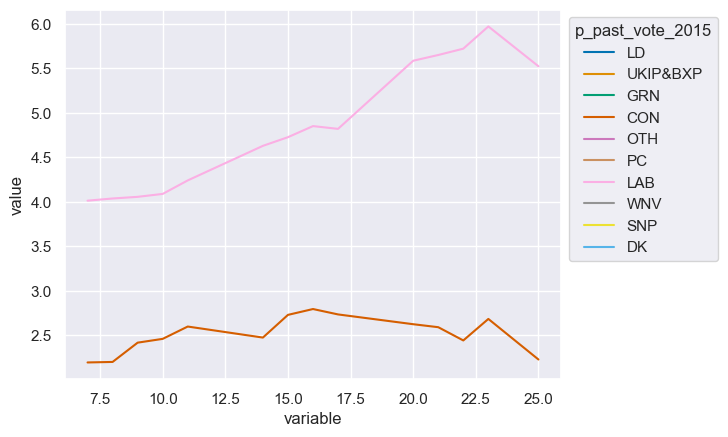

In [84]:
res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP",
 'British National Party (BNP)':"UKIP&BXP",
               }

uniq_list = list(set(replace_dict.values()))

for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    res_df[wave] = BES_Panel["immigSelfW"+str(wave)].groupby(BES_Panel["p_past_vote_"+str(wave_to_pastGE[wave])]\
        .astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list))\
        .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).mean())

res_df = res_df.reset_index().melt(id_vars = ["p_past_vote_2015"])
res_df = res_df[res_df["p_past_vote_2015"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="p_past_vote_2015",);

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

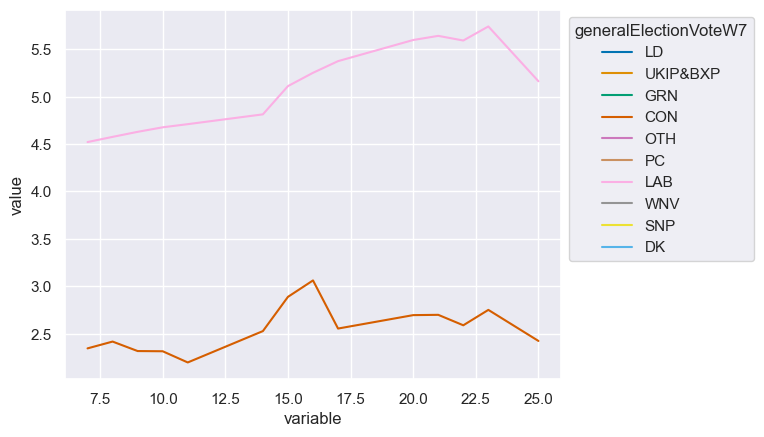

In [83]:
res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))

for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    res_df[wave] = BES_Panel["immigSelfW"+str(wave)].groupby(BES_Panel["generalElectionVoteW"+str(wave)].astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list))\
        .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).mean())

res_df = res_df.reset_index().melt(id_vars = ["generalElectionVoteW7"])
res_df = res_df[res_df["generalElectionVoteW7"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="generalElectionVoteW7");

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [82]:
res_df[res_df["generalElectionVoteW7"].isin(["CON","LAB"])]

,generalElectionVoteW7,variable,value
3,CON,7,2.344823
6,LAB,7,4.521138
13,CON,8,2.416543
16,LAB,8,4.575788
23,CON,9,2.316552
26,LAB,9,4.628923
33,CON,10,2.314407
36,LAB,10,4.676718
43,CON,11,2.196369
46,LAB,11,4.709848


In [57]:

list(set(flatten([list(BES_Panel["generalElectionVoteW"+str(wave)].cat.categories) for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]])))

['Green Party',
 'Labour',
 'An independent candidate',
 'Plaid Cymru',
 "Don't know",
 'Scottish National Party (SNP)',
 'Change UK- The Independent Group',
 'Brexit Party/Reform UK',
 'Conservative',
 'Liberal Democrat',
 'Other',
 'I would/did not vote',
 'United Kingdom Independence Party (UKIP)']

In [44]:
res_df["generalElectionVoteW7"].value_counts()

I would/did not vote                        14
Conservative                                14
Labour                                      14
Liberal Democrat                            14
Scottish National Party (SNP)               14
Plaid Cymru                                 14
United Kingdom Independence Party (UKIP)    14
Green Party                                 14
Other                                       14
Don't know                                  14
Name: generalElectionVoteW7, dtype: int64

In [47]:
BES_Panel["generalElectionVoteW7"].value_counts()

Labour                                      8422
Conservative                                7569
Don't know                                  4813
United Kingdom Independence Party (UKIP)    4265
Scottish National Party (SNP)               1696
Liberal Democrat                            1685
Green Party                                 1061
I would/did not vote                         841
Plaid Cymru                                  272
Other                                        271
Name: generalElectionVoteW7, dtype: int64

In [48]:
BES_Panel["generalElectionVoteW25"].value_counts()

Labour                           9135
Conservative                     6039
Don't know                       5727
Liberal Democrat                 2415
I would/did not vote             2191
Green Party                      1516
Brexit Party/Reform UK           1437
Scottish National Party (SNP)     775
Other                             596
Plaid Cymru                       152
Name: generalElectionVoteW25, dtype: int64

In [95]:
search(BES_Panel,"small").tail(50)

small_mii_catW10             26145
small_mii_catW11             27487
small_mii_catW12             30931
small_mii_catW13             28262
small_mii_catW14             27002
small_mii_catW15             28520
small_mii_catW16             34340
small_mii_catW17             31375
small_mii_catW18             35129
small_mii_catW19             29333
small_mii_catW20             29693
small_mii_catW21             27564
small_mii_catW22             25322
small_mii_catW23             28236
small_mii_catW24             13948
small_mii_catW25             27747
inequalityChangeSmallerW2     1538
inequalityChangeSmallerW3     1451
accessSmallJobsW3             7039
accessSmallLoanW3             7039
smallPartyWastedVoteW4       31551
smallVoterPrefW4             31551
inequalityChangeSmallerW4     1521
smallPartyWastedVoteW6       30258
smallVoterPrefW6             30258
smallPartyWastedVoteW11      30956
smallVoterPrefW11            30956
smallEmergency_1W14          31063
smallEmergency_2W14 

In [92]:
BES_Panel["mii_catW25"].value_counts()

Living costs                9415
Economy-general             4783
Immigration                 3143
Inflation                   2100
Health                      1621
Environment                 1549
Pol-neg                      771
Europe                       604
Poverty                      503
Partisan-neg                 489
Housing                      327
Crime                        315
Inequality                   312
War                          278
Foreign affairs              197
Uncoded                      172
Morals                       132
Asylum                       100
Defence                       91
Taxation                      83
Education                     81
Pol values-auth               74
Austerity                     72
Transport/infrastructure      68
Pol values-liberal            63
Nat ident, goals-loss         59
Pol values-left               58
Unemployment                  52
Gender/sexuality/family       46
Welfare                       42
Domestic e

In [96]:
BES_Panel["small_mii_catW25"].value_counts()

Economy               16467
Immigration            3243
Health                 1654
Environment            1549
Negativity             1289
Other lib-auth         1272
Inequality             1142
Europe                  604
Austerity/spending      303
Other                   124
Other left-right         77
Terrorism                23
Name: small_mii_catW25, dtype: int64

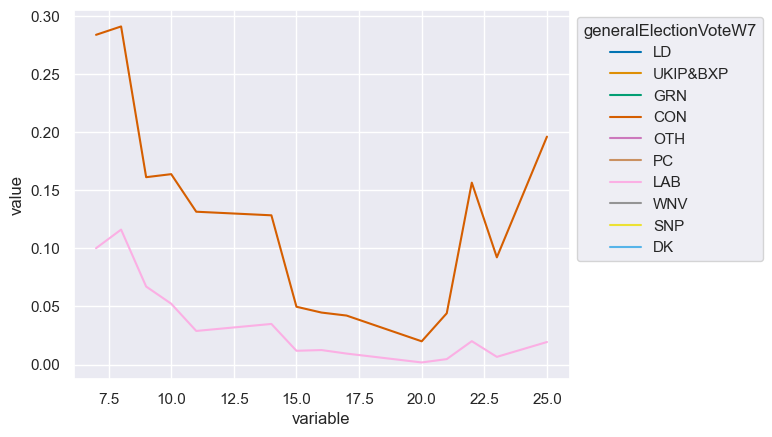

In [108]:
res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))


for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
    vote_split = BES_Panel["generalElectionVoteW"+str(wave)].astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list)
    
    res_df[wave] = BES_Panel["mii_catW"+str(wave)]\
        .groupby(vote_split).apply(lambda x: (x=="Immigration").mean())

res_df = res_df.reset_index().melt(id_vars = ["generalElectionVoteW7"])
res_df = res_df[res_df["generalElectionVoteW7"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="generalElectionVoteW7");

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

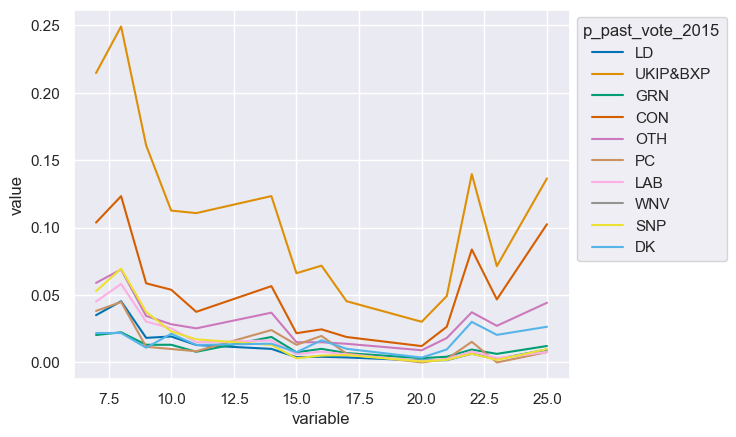

In [114]:
res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))


for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
    vote_split = BES_Panel["p_past_vote_"+str(wave_to_pastGE[wave])]\
        .astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list)
    
    res_df[wave] = BES_Panel["mii_catW"+str(wave)]\
        .groupby(vote_split).apply(lambda x: (x=="Immigration").mean())

res_df = res_df.reset_index().melt(id_vars = ["p_past_vote_2015"])
# res_df = res_df[res_df["p_past_vote_2015"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="p_past_vote_2015");

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

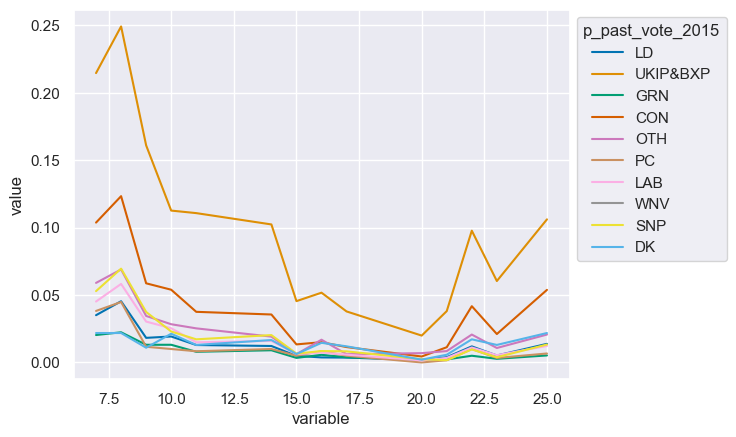

In [115]:
res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))


for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
    vote_split = BES_Panel["p_past_vote_2015"]\
        .astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list)
    
    res_df[wave] = BES_Panel["mii_catW"+str(wave)]\
        .groupby(vote_split).apply(lambda x: (x=="Immigration").mean())

res_df = res_df.reset_index().melt(id_vars = ["p_past_vote_2015"])
# res_df = res_df[res_df["p_past_vote_2015"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="p_past_vote_2015");

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

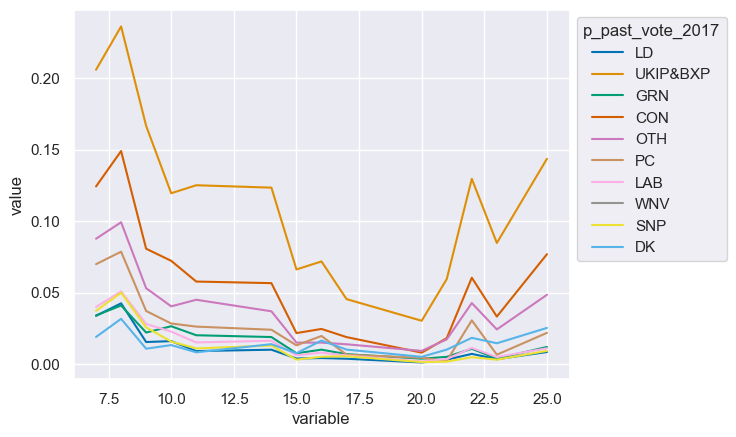

In [152]:
res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))


for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
    vote_split = BES_Panel["p_past_vote_2017"]\
        .astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list)
    
    res_df[wave] = BES_Panel["mii_catW"+str(wave)]\
        .groupby(vote_split).apply(lambda x: (x=="Immigration").mean())

res_df = res_df.reset_index().melt(id_vars = ["p_past_vote_2017"])
# res_df = res_df[res_df["p_past_vote_2015"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="p_past_vote_2017");

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

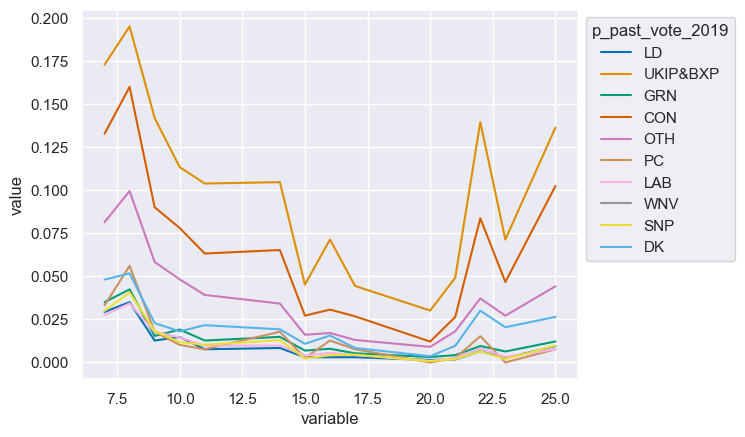

In [153]:
res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))

for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
    vote_split = BES_Panel["p_past_vote_2019"]\
        .astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list)
    
    res_df[wave] = BES_Panel["mii_catW"+str(wave)]\
        .groupby(vote_split).apply(lambda x: (x=="Immigration").mean())

res_df = res_df.reset_index().melt(id_vars = ["p_past_vote_2019"])
# res_df = res_df[res_df["p_past_vote_2015"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="p_past_vote_2019");

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

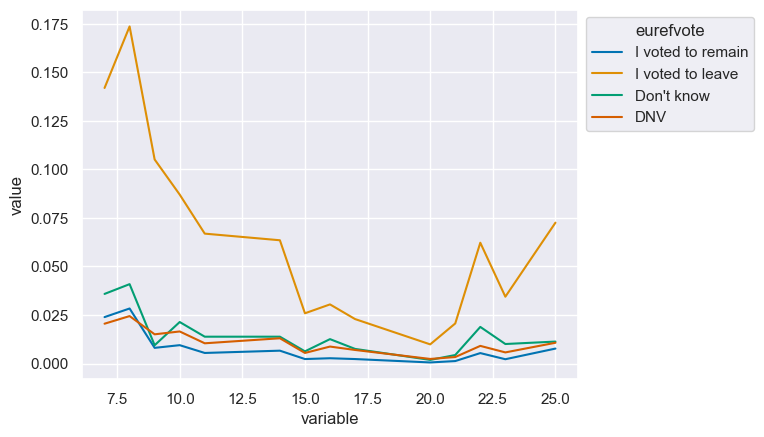

In [169]:
BES_Panel["eurefvote"] = BES_Panel["p_eurefvote"]
BES_Panel["eurefvote"] = BES_Panel["eurefvote"].cat.add_categories("DNV")
BES_Panel.loc[BES_Panel["p_eurefturnout"]=="No, did not vote","eurefvote"] = "DNV"
BES_Panel.loc[BES_Panel["p_eurefturnout"]=="Don't know","eurefvote"] = "Don't know"

res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))

for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
    vote_split = BES_Panel["eurefvote"]
#         .astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list)
    
    res_df[wave] = BES_Panel["mii_catW"+str(wave)]\
        .groupby(vote_split).apply(lambda x: (x=="Immigration").mean())

res_df = res_df.reset_index().melt(id_vars = ["eurefvote"])
# res_df = res_df[res_df["p_past_vote_2015"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="eurefvote");

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

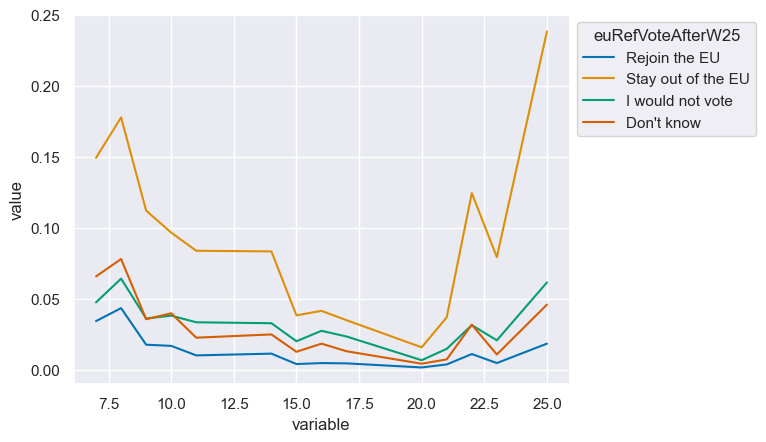

In [172]:
BES_Panel["eurefvote"] = BES_Panel["p_eurefvote"]
BES_Panel["eurefvote"] = BES_Panel["eurefvote"].cat.add_categories("DNV")
BES_Panel.loc[BES_Panel["p_eurefturnout"]=="No, did not vote","eurefvote"] = "DNV"
BES_Panel.loc[BES_Panel["p_eurefturnout"]=="Don't know","eurefvote"] = "Don't know"

res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))

for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
    vote_split = BES_Panel["euRefVoteAfterW25"]
#         .astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list)
    
    res_df[wave] = BES_Panel["mii_catW"+str(wave)]\
        .groupby(vote_split).apply(lambda x: (x=="Immigration").mean())

res_df = res_df.reset_index().melt(id_vars = ["euRefVoteAfterW25"])
# res_df = res_df[res_df["p_past_vote_2015"].isin(["CON","LAB"])]
ax = sns.lineplot(res_df,x="variable",y="value",hue="euRefVoteAfterW25");

# ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

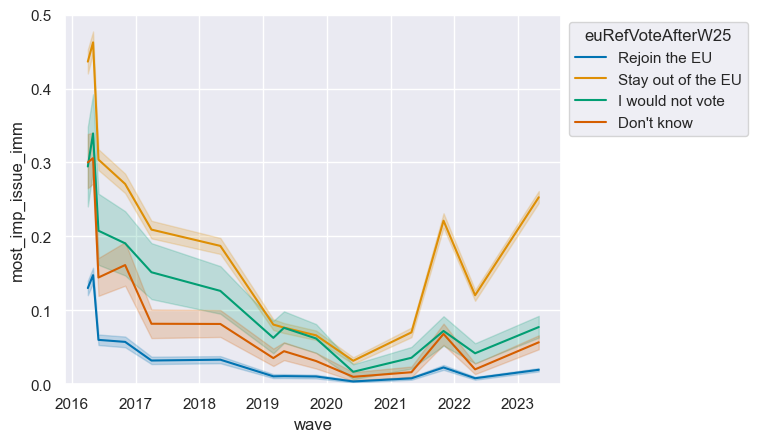

In [46]:
BES_Panel["eurefvote"] = BES_Panel["p_eurefvote"]
BES_Panel["eurefvote"] = BES_Panel["eurefvote"].cat.add_categories("DNV")
BES_Panel.loc[BES_Panel["p_eurefturnout"]=="No, did not vote","eurefvote"] = "DNV"
BES_Panel.loc[BES_Panel["p_eurefturnout"]=="Don't know","eurefvote"] = "Don't know"

res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))

wts = False
split_name = "euRefVoteAfterW25"
focal_name = "most_imp_issue_imm"

for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    
    split_var = "euRefVoteAfterW25"
    focal_var = "mii_catW"+str(wave)
    mask = BES_Panel[split_var].notnull() & BES_Panel[focal_var].notnull()
    
    if wts:
        mask = mask&BES_Panel[wts_for_wave[wave]]
    
    vote_split = BES_Panel[split_var][mask]\
#         .astype(str).replace(replace_dict).astype('category').cat.set_categories(uniq_list)
    
#     res_df[wave] = BES_Panel[focal_var][mask]\
#         .groupby(vote_split).apply(lambda x: (x=="Immigration").mean())
    
    temp_df = pd.DataFrame(columns = ["wave",split_name,focal_name,"wt","focal_name_wts"])
    temp_df[split_name] = vote_split
    temp_df[focal_name] = BES_Panel[focal_var][mask].apply(lambda x: (x=="Immigration")).astype('float')
    temp_df["wave"] = wave
    temp_df["wt"] = BES_Panel[wts_for_wave["W"+str(wave)]][mask]
    temp_df["focal_name_wts"] = list(zip(temp_df[focal_name],temp_df["wt"]))
    res_df = res_df.append(temp_df)
    

# res_df = res_df.reset_index().melt(id_vars = [split_name])
# res_df.columns = [split_name,"wave","value"]
# res_df = res_df[res_df["p_past_vote_2015"].isin(["CON","LAB"])]
res_df["wave"] = res_df["wave"].apply(lambda x: wave_no_to_datetime[x])
ax = sns.lineplot(data=res_df,x="wave",y=focal_name,hue=split_name);
plt.ylim([0,.5]);
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

In [42]:
wave_no_to_datetime[25]

Wave No
25   2022-05-01
24   2022-12-01
23   2022-05-01
22   2021-11-01
21   2021-05-01
20   2020-06-01
19   2019-12-01
18   2019-11-01
17   2019-11-01
16   2019-05-01
15   2019-03-01
14   2018-05-01
13   2017-06-01
12   2017-05-01
11   2017-04-01
10   2016-11-01
9    2016-06-01
8    2016-05-01
7    2016-04-01
6    2015-05-01
5    2015-03-01
4    2015-03-01
3    2014-09-01
2    2014-05-01
1    2014-02-01
Name: Date_Start, dtype: datetime64[ns]

In [45]:
# wave_to_date = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"][["Wave No","Date_Start"]].set_index("Wave No")["Date_Start"]
wave_to_date[25] = 'May-23'
wave_no_to_datetime = pd.Series(wave_to_date).apply(lambda x: pd.to_datetime(x,format='%b-%y'))
# pd.to_datetime(wave_to_date[25],format='%b-%y')

# wave_to_date[25]
# pd.to_datetime('May-22',format='%b-%y')

In [44]:
# ax = sns.lineplot(data=res_df,x="wave",y=focal_name,hue=split_name,weights="wt"
                 
                 
#                  );

# available once we have the updated seaborn!


In [229]:
sns.__version__

'0.12.2'

In [181]:
weighted_value_counts(BES_Panel["euRefVoteAfterW25"],BES_Panel["wt_new_W25"],normalize=True)

,weighted_sample_fraction,raw_sample_size
euRefVoteAfterW25,,
I would not vote,0.08,1497.0
Don't know,0.10,2617.0
Stay out of the EU,0.33,11100.0
Rejoin the EU,0.47,14600.0


id
1         I voted to leave
2         I voted to leave
3         I voted to leave
4                      NaN
5                      NaN
                ...       
113062                 NaN
113063                 NaN
113064                 NaN
113065                 NaN
113066                 NaN
Name: eurefvote, Length: 111621, dtype: category
Categories (4, object): ['I voted to remain' < 'I voted to leave' < 'Don't know' < 'DNV']

I voted to remain    43365
I voted to leave     36294
NaN                  16103
DNV                  14270
Don't know            1589
Name: eurefvote, dtype: int64

In [105]:
res_df = pd.DataFrame()

replace_dict = {'Green Party':"GRN",
 'Labour':"LAB",
 'An independent candidate':"OTH",
 'Plaid Cymru':"PC",
 "Don't know":"DK",
 'Scottish National Party (SNP)':"SNP",
 'Change UK- The Independent Group':"OTH",
 'Brexit Party/Reform UK':"UKIP&BXP",
 'Conservative':"CON",
 'Liberal Democrat':"LD",
 'Other':"OTH",
 'I would/did not vote':"WNV",
 'United Kingdom Independence Party (UKIP)':"UKIP&BXP"}

uniq_list = list(set(replace_dict.values()))

for wave in [7,8,9,10,11,14,15,16,17,20,21,22,23,25]:
    res_df[wave] = BES_Panel["mii_catW"+str(wave)]\
        .groupby(BES_Panel["generalElectionVoteW"+str(wave)]).apply(lambda x: (x=="Immigration").mean())

In [106]:
res_df

,7,8,9,10,11,14,15,16,17,20,21,22,23,25
generalElectionVoteW7,,,,,,,,,,,,,,
I would/did not vote,0.214031,0.222474,0.138070,0.130690,0.110217,0.119393,0.051560,0.046064,0.048356,0.019443,0.034937,0.094207,0.057207,0.099498
Conservative,0.283657,0.290861,0.161180,0.163795,0.131474,0.128385,0.049725,0.044715,0.042146,0.019988,0.044104,0.156482,0.092224,0.196059
Labour,0.100095,0.116097,0.067113,0.052343,0.028900,0.034929,0.011840,0.012463,0.009435,0.001801,0.004667,0.020112,0.006610,0.019376
Liberal Democrat,0.084273,0.093570,0.036543,0.021965,0.012033,0.017333,0.005975,0.004263,0.003743,0.000714,0.003699,0.015257,0.008083,0.030642
Scottish National Party (SNP),0.117925,0.144287,0.073413,0.050206,0.030612,0.036036,0.009278,0.008326,0.010545,0.002852,0.003478,0.018770,0.003835,0.015484
Plaid Cymru,0.117647,0.137184,0.059761,0.055215,0.038674,0.047059,0.015957,0.017391,0.011050,0.000000,0.000000,0.044586,0.016129,0.026316
United Kingdom Independence Party (UKIP),0.526377,0.533540,0.439255,0.403919,0.375536,0.395238,0.138913,0.197034,0.138158,NaN,NaN,NaN,NaN,NaN
Green Party,0.062205,0.079459,0.039755,0.044791,0.031646,0.044983,0.009658,0.008190,0.007064,0.006494,0.008434,0.020639,0.009253,0.020449
Other,0.225092,0.225166,0.106870,0.096000,0.103586,0.166134,0.030277,0.026316,0.046025,0.055556,0.078378,0.178414,0.113244,0.177852


In [ ]:
############### Trump support in current/historical Conservative coalition?

# https://www.statista.com/statistics/879835/british-perceptions-on-donald-trump/

# doesn't seem to have collapsed much after 2020!

In [135]:
round(pd.crosstab(BES_Panel["happyTrumpW10"],BES_Panel["p_past_vote_2015"],values=BES_Panel["wt_new_W10"],aggfunc=sum,
                  
                  normalize='columns',margins=True)*100,2)

p_past_vote_2015,Conservative,Labour,Liberal Democrat,Scottish National Party (SNP),Plaid Cymru,United Kingdom Independence Party (UKIP),Green Party,British National Party (BNP),Other,Don't know,All
happyTrumpW10,,,,,,,,,,,
Extremely disappointed,29.88,54.15,53.43,46.30,65.34,13.34,62.62,11.06,43.59,35.93,39.44
1,8.32,8.71,10.74,8.97,5.92,3.54,9.57,0.00,8.10,6.24,8.03
2,9.93,7.65,10.38,7.72,9.17,4.43,7.54,0.00,7.03,8.62,8.32
3,8.41,5.30,6.73,5.37,1.12,4.19,4.61,16.17,5.54,8.53,6.46
4,4.78,3.07,2.68,4.80,1.71,2.91,2.64,0.00,3.05,1.96,3.68
5,14.62,7.76,7.76,9.32,8.14,21.50,5.60,7.93,13.71,11.10,12.16
6,4.68,1.94,1.78,2.93,0.52,6.98,1.26,20.66,3.81,1.21,3.60
7,4.71,1.90,1.82,2.40,1.65,7.49,1.47,4.38,2.27,2.25,3.65
8,3.70,1.54,0.65,1.44,0.00,9.08,0.51,9.22,1.31,1.55,3.17


In [138]:
round(pd.crosstab(BES_Panel["happyTrumpW10"],BES_Panel["p_turnout_2015"],values=BES_Panel["wt_new_W10"],aggfunc=sum,
                  
                  normalize='columns',margins=True)*100,2)

p_turnout_2015,"No, I did not vote","Yes, I voted",Don't know,All
happyTrumpW10,,,,
Extremely disappointed,35.06,39.44,30.74,38.40
1,7.87,8.03,4.05,7.96
2,7.71,8.32,4.39,8.15
3,5.46,6.46,7.42,6.25
4,4.31,3.68,3.06,3.81
5,11.68,12.16,7.70,12.01
6,2.90,3.60,1.44,3.42
7,2.69,3.65,1.92,3.43
8,3.29,3.17,4.41,3.21


In [141]:
mask = (BES_Panel["p_past_vote_2019"]=="Conservative" ) & (BES_Panel["generalElectionVoteW25"]!="Conservative")
mask.sum()

17610

In [151]:
round(pd.crosstab(BES_Panel["happyTrumpW10"][mask],BES_Panel["p_past_vote_2015"][mask],values=BES_Panel["wt_new_W10"][mask],aggfunc=sum,
                  
#                   normalize='columns',
                  margins=True),2)

p_past_vote_2015,Conservative,Labour,Liberal Democrat,Scottish National Party (SNP),Plaid Cymru,United Kingdom Independence Party (UKIP),Green Party,British National Party (BNP),Other,Don't know,All
happyTrumpW10,,,,,,,,,,,
Extremely disappointed,730.21,162.43,74.27,15.15,5.99,131.63,8.23,0.00,7.36,14.33,1149.61
1,216.85,30.71,13.67,2.91,0.00,29.71,0.49,0.00,1.36,4.60,300.30
2,287.78,46.08,23.36,6.10,0.00,43.47,1.84,0.00,1.50,4.65,414.77
3,225.32,43.18,14.09,4.58,0.00,52.50,3.08,0.00,1.39,5.48,349.62
4,143.88,17.02,7.37,2.86,0.50,31.82,0.62,0.00,1.16,3.32,208.54
5,516.63,100.28,34.47,10.35,4.78,238.92,3.92,0.00,5.85,13.48,928.68
6,167.54,32.54,7.37,6.46,0.00,80.79,2.07,0.88,2.26,1.73,301.64
7,173.27,18.79,10.84,3.38,0.00,77.46,1.37,0.00,0.97,0.90,286.99
8,145.05,28.54,6.26,2.51,0.00,117.69,0.44,0.00,0.82,0.68,302.00


In [ ]:
# 5662.61